In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the dataset
file_path = 'Mixed Playlist.csv'
data = pd.read_csv(file_path)


In [25]:
# Step 1: Data Cleaning and Preparation

# 1. Handle Missing Values
data['name'] = data['name'].fillna("Unknown")
data['album'] = data['album'].fillna("Unknown")

In [27]:
# 2. Encode Categorical Columns
categorical_cols = ['name','artist', 'album', 'top_year', 'user']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoders for inverse transformation later

In [28]:
# 3. Drop Irrelevant Columns
data = data.drop(columns=['uri', 'release_date'])

In [29]:
# 4. Normalize Numerical Columns
numerical_cols = ['length', 'popularity', 'acousticness', 'danceability', 
                  'energy', 'instrumentalness', 'liveness', 'loudness', 
                  'speechiness', 'tempo', 'valence', 'time_signature', 
                  'key', 'mode', 'release_year']
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Verify the cleaned dataset
print("\nCleaned Dataset Info:")
print(data.info())

print("\nSample Data:")
print(data.head())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3600 non-null   int64  
 1   album             3600 non-null   int64  
 2   artist            3600 non-null   int64  
 3   length            3600 non-null   float64
 4   popularity        3600 non-null   float64
 5   acousticness      3600 non-null   float64
 6   danceability      3600 non-null   float64
 7   energy            3600 non-null   float64
 8   instrumentalness  3600 non-null   float64
 9   liveness          3600 non-null   float64
 10  loudness          3600 non-null   float64
 11  speechiness       3600 non-null   float64
 12  tempo             3600 non-null   float64
 13  valence           3600 non-null   float64
 14  time_signature    3600 non-null   float64
 15  key               3600 non-null   float64
 16  mode              3

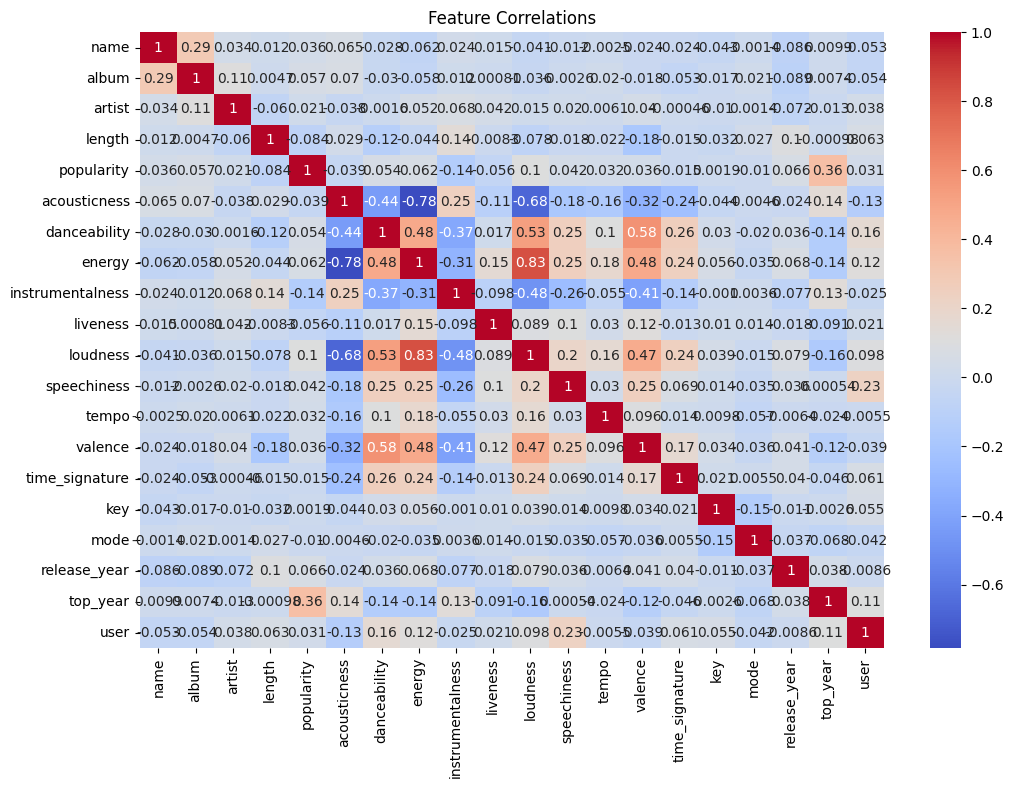

In [30]:
# Step 2: Correlation Analysis (Optional for Feature Importance)
correlation = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

In [32]:
# Step 3: Model Training and Playlist Reconstruction

# 1. Define Features and Targets
X = data.drop(columns=['user', 'top_year'])  # Features
y_user = data['user']  # Target: user prediction
y_year = data['top_year']  # Target: year prediction

In [33]:
# 2. Split Data for User Prediction
X_train_user, X_test_user, y_train_user, y_test_user = train_test_split(X, y_user, test_size=0.2, random_state=42)

# Train Logistic Regression for User Prediction
user_model = LogisticRegression(max_iter=1000)
user_model.fit(X_train_user, y_train_user)

# Evaluate User Prediction
y_pred_user = user_model.predict(X_test_user)
print("\nUser Prediction Classification Report:")
print(classification_report(y_test_user, y_pred_user))


User Prediction Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.15      0.20       144
           1       0.33      0.33      0.33       124
           2       0.43      0.42      0.42       139
           3       0.53      0.54      0.53       155
           4       0.34      0.57      0.42       136
           5       0.00      0.00      0.00        22

    accuracy                           0.39       720
   macro avg       0.32      0.33      0.32       720
weighted avg       0.38      0.39      0.37       720



/Users/germanesteban/Library/Mobile Documents/com~apple~CloudDocs/Documents/Master Data Analitics/Machine Learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/germanesteban/Library/Mobile Documents/com~apple~CloudDocs/Documents/Master Data Analitics/Machine Learning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [34]:
# 3. Split Data for Year Prediction
X_train_year, X_test_year, y_train_year, y_test_year = train_test_split(X, y_year, test_size=0.2, random_state=42)

# Train KNN for Year Prediction
year_model = KNeighborsClassifier(n_neighbors=5)
year_model.fit(X_train_year, y_train_year)

# Evaluate Year Prediction
y_pred_year = year_model.predict(X_test_year)
print("\nYear Prediction Classification Report:")
print(classification_report(y_test_year, y_pred_year))


Year Prediction Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.26      0.20       111
           1       0.12      0.17      0.14        92
           2       0.08      0.07      0.07        95
           3       0.28      0.19      0.22       112
           4       0.20      0.17      0.18        92
           5       0.24      0.20      0.22        98
           6       0.32      0.24      0.28        98
           7       0.00      0.00      0.00        22

    accuracy                           0.18       720
   macro avg       0.17      0.16      0.17       720
weighted avg       0.20      0.18      0.19       720



In [42]:
# Step 4: Reconstruct Playlists
# Predict User and Year for All Songs
data['predicted_user'] = user_model.predict(X)
data['predicted_top_year'] = year_model.predict(X)

# Decode User Back to Original Labels
data['predicted_user'] = label_encoders['user'].inverse_transform(data['predicted_user'])
data['predicted_top_year'] = label_encoders['top_year'].inverse_transform(data['predicted_top_year'])
data['name'] = label_encoders['name'].inverse_transform(data['name'])

# Save Reconstructed Playlists
for user in data['predicted_user'].unique():
    for year in data['predicted_top_year'].unique():
        playlist = data[(data['predicted_user'] == user) & (data['predicted_top_year'] == year)]
        if not playlist.empty:
            filename = f"{user}_playlist_{year}.csv"
            playlist.to_csv(filename, index=False)
            print(f"Saved playlist for user '{user}' and year '{year}' as {filename}")


Saved playlist for user 'beta' and year '2022' as beta_playlist_2022.csv
Saved playlist for user 'beta' and year '2018' as beta_playlist_2018.csv
Saved playlist for user 'beta' and year '2021' as beta_playlist_2021.csv
Saved playlist for user 'beta' and year '2020' as beta_playlist_2020.csv
Saved playlist for user 'beta' and year '2024' as beta_playlist_2024.csv
Saved playlist for user 'beta' and year '2023' as beta_playlist_2023.csv
Saved playlist for user 'beta' and year '2019' as beta_playlist_2019.csv
Saved playlist for user 'beta' and year 'unknown' as beta_playlist_unknown.csv
Saved playlist for user 'gamma' and year '2022' as gamma_playlist_2022.csv
Saved playlist for user 'gamma' and year '2018' as gamma_playlist_2018.csv
Saved playlist for user 'gamma' and year '2021' as gamma_playlist_2021.csv
Saved playlist for user 'gamma' and year '2020' as gamma_playlist_2020.csv
Saved playlist for user 'gamma' and year '2024' as gamma_playlist_2024.csv
Saved playlist for user 'gamma' and

In [43]:
# Step 5: Recommendation Algorithm
def recommend_next_song(current_song_features, data, n_recommendations=5):
    """
    Recommend next songs based on feature similarity.

    Args:
    - current_song_features (pd.Series): Features of the current song.
    - data (pd.DataFrame): Dataset with all songs.
    - n_recommendations (int): Number of recommendations.

    Returns:
    - pd.DataFrame: Recommended songs.
    """
    # Compute similarity (Euclidean distance)
    data['similarity'] = data[numerical_cols].apply(
        lambda row: np.linalg.norm(row - current_song_features), axis=1
    )

    # Sort by similarity and return top recommendations
    recommendations = data.sort_values(by='similarity').head(n_recommendations)
    return recommendations.drop(columns=['similarity'])

In [44]:
# Example usage of recommendation system
current_song = X.iloc[0]  # Select a song from the dataset (e.g., the first song)
recommendations = recommend_next_song(current_song, data)
print("\nRecommended Songs:")
print(recommendations[['name','artist', 'predicted_user', 'predicted_top_year']])


Recommended Songs:
                                                name  artist predicted_user  \
0  Variations on a Polish Theme, Op. 10: No. 5 An...     655           beta   
1  Je vous trouve un charme fou - En duo avec Gaë...     521          gamma   
2                                           Me Gusta     259          gamma   
3                               L’amour en Solitaire     635          delta   
4                                     Goodnight Moon     160          alpha   

  predicted_top_year  
0               2022  
1               2018  
2               2018  
3               2018  
4               2021  
